In [49]:
import pandas as pd
from sklearn import * 
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("/data/creditcard-fraud.csv.gz")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df.Class.value_counts()/len(df)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [19]:
target = "Class"
X = df.iloc[:, 1:-2].values
#X = df.loc[:, "V1": "V28"]
y = df[target].values

training_size = int(0.7*len(df))
X_train = X[:training_size]
X_test = X[training_size:]
print(X_train.shape, X_test.shape)

y_train = y[:training_size]
y_test = y[training_size:]


(199364, 28) (85443, 28)


In [25]:
pipe = pipeline.Pipeline([
    #("poly", preprocessing.PolynomialFeatures(degree=2
    #                                          , include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(solver="liblinear"))
])


pipe.fit(X_train, y_train) 
# training is happening to build the model
# Essetially, the coefficients/weights/parameters values are calculated

# Doing the prediction
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
y_test_prob = pipe.predict_proba(X_test)[:, 1]

y_test_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_prob)
auc = metrics.auc(fpr, tpr)

print("training accuracy:"
      , metrics.accuracy_score(y_train, y_train_pred))

print("test accuracy:"
      , metrics.accuracy_score(y_test, y_test_pred))

print("test precision:"
      , metrics.precision_score(y_test, y_test_pred))
print("test recall:"
      , metrics.recall_score(y_test, y_test_pred))
print("test f1-score:"
      , metrics.f1_score(y_test, y_test_pred))

print("test auc-score:"
      , auc)

print(metrics.confusion_matrix(y_test, y_test_pred))

training accuracy: 0.999046969362573
test accuracy: 0.9992158515033414
test precision: 0.7971014492753623
test recall: 0.5092592592592593
test f1-score: 0.6214689265536724
test auc-score: 0.9707251811488057
[[85321    14]
 [   53    55]]


In [24]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_test_prob)
auc = metrics.auc(fpr, tpr)

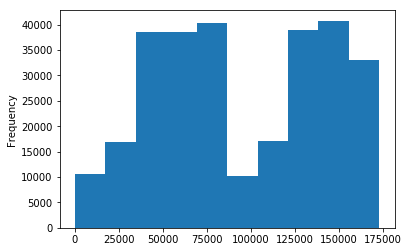

In [29]:
df.Time.plot.hist()

In [45]:
df[training_size:][(y_test_pred == 0) & (y_test == 1)].Amount.sum()

8336.050000000001

In [47]:
df[training_size:].shape

(85443, 31)

In [48]:
(y_test_pred == 0) & (y_test == 1)

array([False, False, False, ..., False, False, False])

In [50]:
a = np.random.random((10, 3))
a

array([[0.08146481, 0.94863658, 0.53462966],
       [0.72734497, 0.63195528, 0.23073551],
       [0.7786033 , 0.56522353, 0.89963686],
       [0.51679339, 0.88227423, 0.65626579],
       [0.41187391, 0.24086896, 0.35469007],
       [0.2930007 , 0.97313585, 0.37885579],
       [0.27945197, 0.06383845, 0.09486247],
       [0.62565805, 0.75620344, 0.04275805],
       [0.45257845, 0.56891305, 0.58812729],
       [0.5552365 , 0.95511108, 0.9300899 ]])

In [51]:
a[[1, 3, 4]]

array([[0.72734497, 0.63195528, 0.23073551],
       [0.51679339, 0.88227423, 0.65626579],
       [0.41187391, 0.24086896, 0.35469007]])

In [52]:
a[[False, True, False, False, False, False, False, False, False, False]]

array([[0.72734497, 0.63195528, 0.23073551]])

In [53]:
a[[False, True]]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 2

In [54]:
a[[1, 3, 20]]

IndexError: index 20 is out of bounds for axis 0 with size 10

In [55]:
a[[1, 3, -1]]

array([[0.72734497, 0.63195528, 0.23073551],
       [0.51679339, 0.88227423, 0.65626579],
       [0.5552365 , 0.95511108, 0.9300899 ]])

In [56]:
a[[1, 3, 1]]

array([[0.72734497, 0.63195528, 0.23073551],
       [0.51679339, 0.88227423, 0.65626579],
       [0.72734497, 0.63195528, 0.23073551]])

In [61]:
a[np.hstack((np.repeat(1, 10), np.repeat(4, 10)))]

array([[0.72734497, 0.63195528, 0.23073551],
       [0.72734497, 0.63195528, 0.23073551],
       [0.72734497, 0.63195528, 0.23073551],
       [0.72734497, 0.63195528, 0.23073551],
       [0.72734497, 0.63195528, 0.23073551],
       [0.72734497, 0.63195528, 0.23073551],
       [0.72734497, 0.63195528, 0.23073551],
       [0.72734497, 0.63195528, 0.23073551],
       [0.72734497, 0.63195528, 0.23073551],
       [0.72734497, 0.63195528, 0.23073551],
       [0.41187391, 0.24086896, 0.35469007],
       [0.41187391, 0.24086896, 0.35469007],
       [0.41187391, 0.24086896, 0.35469007],
       [0.41187391, 0.24086896, 0.35469007],
       [0.41187391, 0.24086896, 0.35469007],
       [0.41187391, 0.24086896, 0.35469007],
       [0.41187391, 0.24086896, 0.35469007],
       [0.41187391, 0.24086896, 0.35469007],
       [0.41187391, 0.24086896, 0.35469007],
       [0.41187391, 0.24086896, 0.35469007]])